In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
cd /content/drive/MyDrive/PythonProject/Triplet Loss Model

/content/drive/MyDrive/PythonProject/Triplet Loss Model


In [44]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [45]:
Path_data = '../Face_Gathering/dataset2'
images = []
labels = []
classname = []

In [46]:
count = 0
for folder in os.listdir(Path_data):
    for file in os.listdir(os.path.join(Path_data, folder)):
        tmp = cv2.imread(os.path.join(Path_data, folder, file))
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        # tmp = cv2.resize(tmp, (160, 160))
        images.append(tmp)
        labels.append(folder)
        del tmp
    count += 1
    # classname.append(folder)

In [47]:
print(labels.count(0))
print(labels.count(1))
print(labels.count(2))

0
0
0


In [48]:
images = np.array(images)
labels = np.array(labels)
# classname = np.array(classname)

In [49]:
images.shape

(715, 180, 180, 3)

In [50]:
labels.shape

(715,)

In [51]:
# classname.shape

In [52]:
# classname

In [53]:
from scipy.spatial.distance import cosine
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import MaxPooling2D

# def face_regconition_net():
#     model = VGG16(include_top = False, weights= None, input_shape = (180, 180, 3))
#     pool = MaxPooling2D(pool_size=(2, 2))(model.layers[-4].output)
#     flatten = Flatten()(pool)
#     dense = Dense(128, activation = 'relu')(flatten)
#     norm2 = Lambda(lambda x: tf.math.l2_normalize(x, axis = 1))(dense)
#     model = Model(inputs = [model.input], outputs = [norm2])
#     return model

# model = face_regconition_net()
# model.summary()


In [54]:
# !pip install tensorflow_addons

In [55]:
# import tensorflow_addons as tfa

# model.compile(
#     optimizer=SGD(lr=0.001, momentum=0.9, nesterov=True),
#     loss=tfa.losses.TripletHardLoss())

# print("Loading pre-trained weight")
# model.load_weights('Models/triplet_weight_rgb_450_face_root_semi_hard_triplet.hdf5')

In [56]:
pip install keras_facenet

     |████████████████████████████████| 2.3MB 6.6MB/s 
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-cp37-none-any.whl size=10386 sha256=5117f43dbe2dd1989fa440241021731b370d4cc9f831810731104b3235e42c33
  Stored in directory: /root/.cache/pip/wheels/f6/53/9a/36c4b52fd22faf4f710d5047d874655b85a1b2cf77accfb9bd
Successfully built keras-facenet


In [57]:
from keras_facenet import FaceNet 
model = FaceNet()

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.stack(images), labels, test_size = 0.8, stratify = labels)

print(X_train.shape, X_test.shape)
print(len(y_train), len(y_test))


(143, 180, 180, 3) (572, 180, 180, 3)
143 572


In [59]:
# X_train_vec = model.predict(X_train) # lam goc
# X_test_vec = model.predict(X_test) # de kiem tra so voi cai vector goc

X_train_vec = model.embeddings(X_train)
X_test_vec = model.embeddings(X_test)

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
def _most_similarity(embed_vecs, vec, labels):
  sim = cosine_similarity(embed_vecs, vec)
  sim = np.squeeze(sim, axis = 1)
  argmax = np.argsort(sim)[::-1][:1]
  label = [labels[idx] for idx in argmax][0]
  return label

In [61]:
from sklearn.metrics import accuracy_score
y_preds = []
for vec in X_test_vec:
  vec = vec.reshape(1, -1)
  y_pred = _most_similarity(X_train_vec, vec, y_train)
  y_preds.append(y_pred)

print(accuracy_score(y_preds, y_test))

1.0


In [62]:
y_preds.count(0)

0

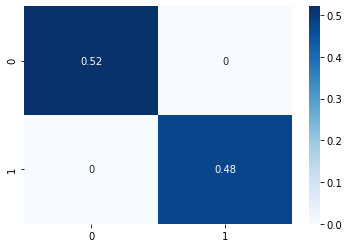

In [63]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

result = confusion_matrix(y_preds, y_test)
classname = np.unique(labels)


sns.heatmap(result/np.sum(result), annot=True, cmap='Blues')


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

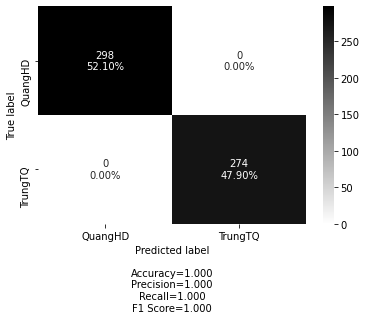

In [65]:
make_confusion_matrix(np.array(result),
                      categories=classname, 
                      cmap='binary')

Text(83.40000000000006, 0.5, 'predicted label')

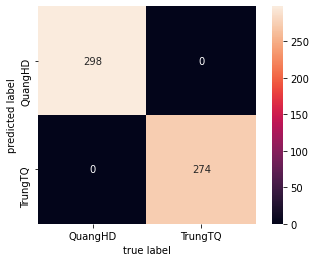

In [66]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, xticklabels=classname, yticklabels=classname)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [67]:
y_train

array(['QuangHD', 'QuangHD', 'QuangHD', 'QuangHD', 'TrungTQ', 'QuangHD',
       'TrungTQ', 'TrungTQ', 'QuangHD', 'QuangHD', 'TrungTQ', 'QuangHD',
       'QuangHD', 'TrungTQ', 'TrungTQ', 'TrungTQ', 'TrungTQ', 'TrungTQ',
       'TrungTQ', 'QuangHD', 'QuangHD', 'TrungTQ', 'QuangHD', 'QuangHD',
       'QuangHD', 'QuangHD', 'QuangHD', 'QuangHD', 'TrungTQ', 'QuangHD',
       'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ', 'QuangHD', 'QuangHD',
       'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ', 'QuangHD', 'QuangHD',
       'TrungTQ', 'QuangHD', 'QuangHD', 'QuangHD', 'TrungTQ', 'QuangHD',
       'QuangHD', 'QuangHD', 'QuangHD', 'TrungTQ', 'TrungTQ', 'QuangHD',
       'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ',
       'QuangHD', 'TrungTQ', 'TrungTQ', 'TrungTQ', 'TrungTQ', 'TrungTQ',
       'QuangHD', 'QuangHD', 'TrungTQ', 'TrungTQ', 'QuangHD', 'QuangHD',
       'TrungTQ', 'TrungTQ', 'TrungTQ', 'TrungTQ', 'QuangHD', 'TrungTQ',
       'TrungTQ', 'TrungTQ', 'QuangHD', 'TrungTQ', 

In [68]:
# !pip uninstall scikit-learn -y

# !pip install scikit-learn==0.23.2

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
import sklearn
from sklearn.multiclass import OneVsRestClassifier

# in_encoder = Normalizer()
# emdTrainX_norm = in_encoder.transform(X_train_vec)
# emdTestX_norm = in_encoder.transform(X_test_vec)

In [70]:
# # One Hot Vector Label
# from sklearn.preprocessing import LabelBinarizer

# lb = LabelBinarizer()
# trainLabelOH = lb.fit_transform(y_train)
# testLabelOH = lb.fit_transform(y_test)

In [71]:
# out_encoder = LabelEncoder()
# out_encoder.fit(y_train)
# trainy_enc = out_encoder.transform(y_train)
# testy_enc = out_encoder.transform(y_test)

In [72]:
SVM = SVC(kernel='linear', probability=True)
model  = OneVsRestClassifier(SVM)
model.fit(X_train_vec, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [73]:
yhat_train = model.predict(X_train_vec)
yhat_test = model.predict(X_test_vec)

In [74]:
X_train_vec

array([[ 0.03885772, -0.01310716, -0.03107396, ..., -0.07177216,
        -0.01601669, -0.00027605],
       [-0.02301038, -0.00459822, -0.04185515, ..., -0.07723316,
         0.04125707,  0.01722734],
       [ 0.00381203,  0.01758789, -0.02727087, ..., -0.05467553,
        -0.00076057, -0.01985266],
       ...,
       [ 0.01671132, -0.01046779, -0.02990355, ..., -0.08677172,
        -0.01120423,  0.00890153],
       [ 0.07837705,  0.00352137, -0.02873142, ..., -0.08055912,
         0.03644292,  0.01018862],
       [-0.00602818,  0.01893944, -0.03209769, ..., -0.04775241,
         0.02229005, -0.0067502 ]], dtype=float32)

In [75]:
yhat_test

array(['TrungTQ', 'TrungTQ', 'QuangHD', 'TrungTQ', 'TrungTQ', 'TrungTQ',
       'TrungTQ', 'TrungTQ', 'QuangHD', 'QuangHD', 'TrungTQ', 'TrungTQ',
       'TrungTQ', 'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ', 'TrungTQ',
       'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ',
       'TrungTQ', 'TrungTQ', 'QuangHD', 'TrungTQ', 'QuangHD', 'QuangHD',
       'TrungTQ', 'TrungTQ', 'QuangHD', 'QuangHD', 'TrungTQ', 'QuangHD',
       'TrungTQ', 'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ', 'QuangHD',
       'TrungTQ', 'QuangHD', 'QuangHD', 'QuangHD', 'TrungTQ', 'TrungTQ',
       'TrungTQ', 'QuangHD', 'QuangHD', 'QuangHD', 'QuangHD', 'TrungTQ',
       'QuangHD', 'TrungTQ', 'TrungTQ', 'QuangHD', 'QuangHD', 'TrungTQ',
       'QuangHD', 'QuangHD', 'TrungTQ', 'QuangHD', 'TrungTQ', 'TrungTQ',
       'TrungTQ', 'QuangHD', 'QuangHD', 'QuangHD', 'QuangHD', 'TrungTQ',
       'QuangHD', 'TrungTQ', 'TrungTQ', 'TrungTQ', 'TrungTQ', 'QuangHD',
       'TrungTQ', 'TrungTQ', 'TrungTQ', 'QuangHD', 

In [76]:
score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


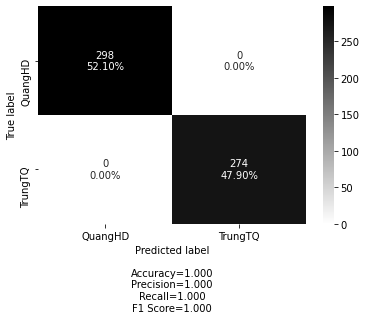

In [77]:
result = confusion_matrix(yhat_test, y_test)
make_confusion_matrix(np.array(result),
                      categories=classname, 
                      cmap='binary')

In [78]:
cd Evaluate\ and\ plot\ model

/content/drive/My Drive/PythonProject/Triplet Loss Model/Evaluate and plot model


In [79]:
import pickle
with open("model_using_svm.sav", "wb") as f:
    pickle.dump(model, f)

In [80]:
ls

 evaluate_model.ipynb       model_using_svm.sav
'Evaluate Model v2.ipynb'   Plot_history.ipynb


In [81]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [84]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

AttributeError: ignored